<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/reach_drainflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reach Drainflow**

By Carli Beisel

Created: August 2024

Purpose: Compile and clean drainflow data for each reach.



**Reach**

There are 6 reaches total in Mason Drainage. 4 on Mason Creek, 1 on Solomon Drain, and 1 on Purdum Drain.

*Qin* is the upstream gauge on the Reach, and *Qout* is the downstream gauge.

In [1]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd # to work with dataframe
import os # for file paths
import glob # read in a folder of csv
import numpy as np # basic statistics

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
## --------------- ##
##  LOAD DATASETS  ##
## --------------- ##

drainflows = glob.glob ('/content/drive/MyDrive/Data/Mason/drainflow/ethos_gauges/*.csv')

In [ ]:
## --------------- ##
##    Clean Data   ##
## --------------- ##

# remove NA and 0
needed?


In [57]:
## ------------------------------------- ##
##   Average daily flow for each gauge   ##
## ------------------------------------- ##

average_streamflows = pd.DataFrame()

for file in drainflows:
    df = pd.read_csv(file)
    df['Time'] = pd.to_datetime(df['Time'])
    df['Time'] = df['Time'].dt.date
    gauge_name = os.path.basename(file).replace('.csv', '') # extract the gauge name from the file
    daily_avg = df.groupby('Time')['Flow'].mean().reset_index() #g roup by date and compute flows
    daily_avg['Gauge'] = gauge_name # add gauge name as new column
    average_streamflows = pd.concat([average_streamflows, daily_avg])

average_streamflows.to_csv('/content/drive/MyDrive/Data/Mason/drainflow/average_drainflows.csv', index=False)


In [60]:
file = pd.read_csv('/content/drive/MyDrive/Data/Mason/drainflow/average_drainflows.csv')
file.columns

Index(['Time', 'Flow', 'Gauge'], dtype='object')

## Compile flow data for each Reach

In [63]:
# flow file for all reaches
df = pd.read_csv('/content/drive/MyDrive/Data/Mason/drainflow/average_drainflows.csv')

In [32]:
# ---------------- #
#       Reach 1
# ---------------- #

# Reach 1 (Mason Creek at Phyllis --> Mason Creek at Madison)

reach1_qin = df[df['Gauge'] == "Mason Creek at Phyllis"]['Flow']
reach1_qout = df[df['Gauge'] == "Mason Creek at Madison"]['Flow']

In [ ]:
# ---------------- #
#       Reach 2
# ---------------- #

# Reach 2 (Mason Creek at Madison --> Mason Creek at Ustick and Northside)

reach2_qin = df[df['Gauge'] == "Mason Creek at Madison"]['Flow']
reach2_qout = df[df['Gauge'] == "Mason Creek at Ustick and Northside"]['Flow']

In [ ]:
# ---------------- #
#       Reach 3
# ---------------- #

# Reach 3 (Mason Creek at Ustick and Northside --> Mason Creek at Marble Front Road)
reach3_qin = df[df['Gauge'] == "Mason Creek at Ustick and Northside"]['Flow']
reach3_qout = df[df['Gauge'] == "Mason Creek at Marble Front Road"]['Flow']

In [ ]:
# ---------------- #
#       Reach 4
# ---------------- #

# Reach 4 (Mason Creek at Marble Front Road --> Mason Creek USGS Gauge)
reach4_qin = df[df['Gauge'] == "Mason Creek at Marble Front Road"]['Flow']
reach4_qout = df[df['Gauge'] == "Mason Creek USGS Gauge"]['Flow']

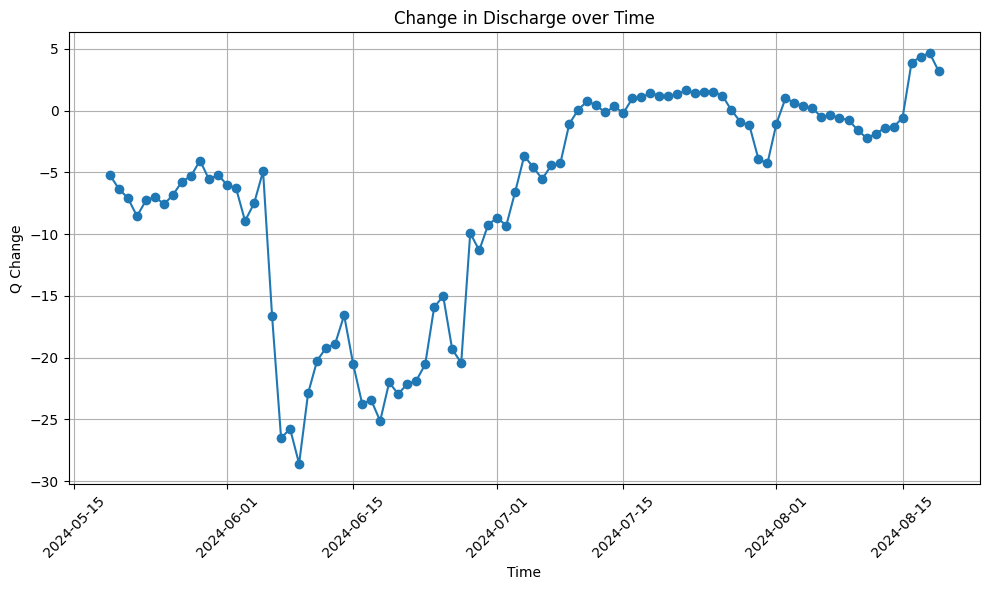

In [74]:
# ---------------- #
#   Purdum Reach
# ---------------- #

# (Purdum at the Phyllis --> Purdum at Sweetwater)

purdum_qin = df[df['Gauge'] == "Purdum at the Phyllis"][['Time', 'Flow']].rename(columns={'Flow': 'q_in'})
purdum_qout = df[df['Gauge'] == "Purdum at Sweetwater"][['Time', 'Flow']].rename(columns={'Flow': 'q_out'})
purdum= pd.merge(purdum_qin, purdum_qout, on='Time', how='inner')
purdum['q_diff'] = purdum['q_in'] - purdum['q_out'] #calculate the difference

purdum.to_csv('/content/drive/MyDrive/Data/Mason/drainflow/reach_drainflow/purdum_flow.csv', index=False)

# janky figure
import matplotlib.pyplot as plt


# Ensure 'Time' column is in datetime format
purdum['Time'] = pd.to_datetime(purdum['Time'])

# Plotting q_diff over time
plt.figure(figsize=(10, 6))
plt.plot(purdum['Time'], purdum['q_diff'], marker='o', linestyle='-')
plt.title('Change in Discharge over Time')
plt.xlabel('Time')
plt.ylabel('Q Change')
plt.grid(True)

# Set x-axis major locator and formatter to handle the time correctly
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))  # Adjust maxticks for desired number of ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format x-ticks as dates

plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

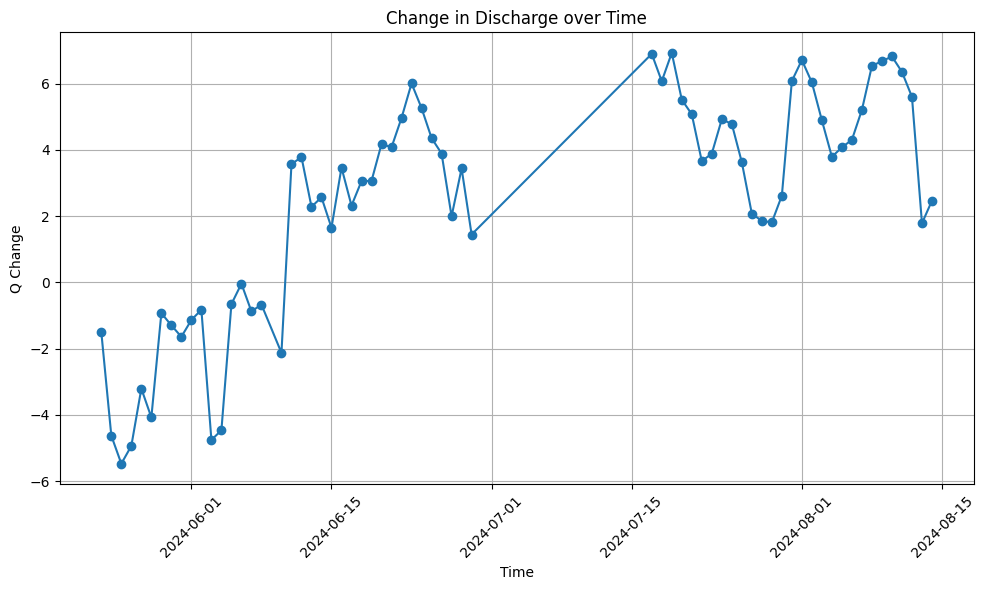

In [73]:
# ---------------- #
#   Solomon Reach
# ---------------- #

# Solomon Reach (Solomon Drain at Highline Canal --> Solomon Drain at Marble Front Road)
solomon_qin = df[df['Gauge'] == "Solomon drain at highline"][['Time', 'Flow']].rename(columns={'Flow': 'q_in'})
solomon_qout = df[df['Gauge'] == "Solomon Drain at marble front"][['Time', 'Flow']].rename(columns={'Flow': 'q_out'})

solomon= pd.merge(solomon_qin, solomon_qout, on='Time', how='inner')
solomon['q_diff'] = solomon['q_in'] - solomon['q_out'] #calculate the difference

solomon.to_csv('/content/drive/MyDrive/Data/Mason/drainflow/reach_drainflow/solomon_flow.csv', index=False)

# janky figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Ensure 'Time' column is in datetime format
solomon['Time'] = pd.to_datetime(solomon['Time'])

# Plotting q_diff over time
plt.figure(figsize=(10, 6))
plt.plot(solomon['Time'], solomon['q_diff'], marker='o', linestyle='-')
plt.title('Change in Discharge over Time')
plt.xlabel('Time')
plt.ylabel('Q Change')
plt.grid(True)

# Set x-axis major locator and formatter to handle the time correctly
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))  # Adjust maxticks for desired number of ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format x-ticks as dates

plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

## Export Final Dataset

In [ ]:
## -------------------------------- ##
##      Export Final Datasets       ##
## -------------------------------- ##

# Indiviudal Reach Dataset

output_directory = '/content/drive/MyDrive/Data/Mason/drainflow/reach_drainflow/'